#TP3: Clustering et word2vec
#Traitement automatique de corpus
#Notebook pour effectuer un clustering des documents CAMille pour la décennie 1920 et entraîner un modèle word2vec sur l’ensemble du corpus et d’explorer les relations entre vecteurs relatifs à l´année 1920.

Étapes à suivre:
1. Télécharger le corpus "CAMille"."

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aspng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aspng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
data_path = "C:/Users/aspng/ULB_TAC/tac/data/txt"


In [4]:
# Vérifier si le chemin existe
if not os.path.exists(data_path):
    print(f"Le chemin {data_path} n'existe pas. Vérifiez la structure des dossiers.")
    
# Afficher le répertoire de travail actuel
print(f"Répertoire actuel : {os.getcwd()}")

# Lister les dossiers disponibles
print("Dossiers disponibles :", [d for d in os.listdir('..') if os.path.isdir(os.path.join('..', d))])

Répertoire actuel : c:\Users\aspng\ULB_TAC\tac\tps\tp3
Dossiers disponibles : ['tp1', 'tp2', 'tp3', 'tp4']


In [17]:
DECADE = '1920'

In [6]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [18]:
import os

files = [
    f for f in sorted(os.listdir(data_path))
    if f"_{DECADE[:-1]}" in f
]

print("Fichiers trouvés :", files)


Fichiers trouvés : ['KB_JB838_1920-01-13_01-00005.txt', 'KB_JB838_1920-01-18_01-00014.txt', 'KB_JB838_1920-02-04_01-00001.txt', 'KB_JB838_1920-02-04_01-00002.txt', 'KB_JB838_1920-02-06_01-00004.txt', 'KB_JB838_1920-02-07_01-00006.txt', 'KB_JB838_1920-02-08_01-00005.txt', 'KB_JB838_1920-02-08_01-00010.txt', 'KB_JB838_1920-02-10_01-00002.txt', 'KB_JB838_1920-02-27_01-00011.txt', 'KB_JB838_1920-02-29_01-00005.txt', 'KB_JB838_1920-03-01_01-00004.txt', 'KB_JB838_1920-03-04_01-00008.txt', 'KB_JB838_1920-03-08_01-00001.txt', 'KB_JB838_1920-03-11_01-00004.txt', 'KB_JB838_1920-03-17_01-00001.txt', 'KB_JB838_1920-03-19_01-00001.txt', 'KB_JB838_1920-03-19_01-00003.txt', 'KB_JB838_1920-03-19_01-00004.txt', 'KB_JB838_1920-03-22_01-00002.txt', 'KB_JB838_1920-03-23_01-00004.txt', 'KB_JB838_1920-03-25_01-00002.txt', 'KB_JB838_1920-03-29_01-00003.txt', 'KB_JB838_1920-04-08_01-00002.txt', 'KB_JB838_1920-04-13_01-00008.txt', 'KB_JB838_1920-04-14_01-00007.txt', 'KB_JB838_1920-04-17_01-00007.txt', 'KB_JB83

In [ ]:
files = list(files) 
print(files[:5])

['KB_JB838_1920-01-13_01-00005.txt', 'KB_JB838_1920-01-18_01-00014.txt', 'KB_JB838_1920-02-04_01-00001.txt', 'KB_JB838_1920-02-04_01-00002.txt', 'KB_JB838_1920-02-06_01-00004.txt']


In [8]:
# Exemple de fichiers
files[:5]

['KB_JB838_1920-01-13_01-00005.txt',
 'KB_JB838_1920-01-18_01-00014.txt',
 'KB_JB838_1920-02-04_01-00001.txt',
 'KB_JB838_1920-02-04_01-00002.txt',
 'KB_JB838_1920-02-06_01-00004.txt']

In [3]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [19]:
print(data_path)
print(DECADE)


C:/Users/aspng/ULB_TAC/tac/data/txt
1920


In [21]:
texts = [
    open(os.path.join(data_path, f), "r", encoding="utf-8").read()
    for f in files
]


In [28]:
import string
from nltk.tokenize import word_tokenize

def preprocessing(text, stem=True):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    return tokens


In [29]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [31]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 811417 stored elements and shape (1000, 3982)>

In [48]:
from sklearn.cluster import KMeans
N_CLUSTERS = 5

In [42]:
# Version avec glob pour une filtrage par motif
files = []
for fname in sorted(os.listdir(data_path)):
    if f"_{DECADE[:-1]}" in fname:
        files.append(fname)



In [43]:
# Exemple de fichiers
files[:5]

['KB_JB838_1920-01-13_01-00005.txt',
 'KB_JB838_1920-01-18_01-00014.txt',
 'KB_JB838_1920-02-04_01-00001.txt',
 'KB_JB838_1920-02-04_01-00002.txt',
 'KB_JB838_1920-02-06_01-00004.txt']

In [44]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [45]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [46]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [50]:
km_model = KMeans(n_clusters=N_CLUSTERS)
clusters = km_model.fit_predict(tfidf_vectors)

print(clusters)

[3 0 0 0 4 2 3 3 0 1 3 3 1 0 4 0 0 0 4 0 4 0 0 0 1 2 2 0 0 4 3 0 0 1 0 0 0
 2 3 0 4 2 1 0 0 1 0 2 0 1 4 2 0 4 0 3 0 0 0 2 0 4 2 3 0 2 0 1 0 1 0 2 2 2
 2 0 0 0 3 3 3 0 1 1 4 0 0 0 0 0 0 1 2 0 0 0 3 0 1 0 0 2 3 3 0 4 2 2 2 4 0
 1 0 4 0 0 4 0 2 0 0 0 0 3 0 0 2 0 0 3 0 0 1 1 3 2 0 0 1 4 0 4 1 2 2 0 2 2
 1 2 0 2 1 1 0 0 1 0 0 2 4 0 2 0 0 0 0 4 0 2 1 0 3 3 2 0 4 2 0 0 4 3 2 2 0
 0 1 1 0 1 0 2 0 0 3 0 1 1 4 0 2 0 4 3 0 2 4 1 0 2 2 0 0 2 3 2 2 0 4 1 0 0
 0 2 0 2 1 0 3 2 2 1 2 0 0 2 1 4 4 2 2 4 3 0 4 0 2 2 0 3 3 1 2 3 0 0 3 0 3
 0 2 0 0 0 0 4 1 0 3 0 0 1 1 0 0 2 1 2 0 0 2 0 0 3 3 0 3 1 0 1 2 3 3 2 1 0
 0 1 1 0 0 3 2 0 2 0 0 0 3 3 2 0 0 0 2 0 0 0 0 3 0 0 3 3 2 0 3 1 2 0 0 0 0
 3 2 0 2 0 0 0 0 3 0 1 0 1 2 0 0 0 0 0 2 1 0 0 0 0 2 3 2 0 2 4 0 0 0 0 0 2
 0 0 0 3 2 0 2 0 0 0 0 0 3 1 1 2 3 0 0 1 2 1 0 0 0 1 0 0 0 0 4 1 1 1 3 2 2
 1 0 0 4 0 0 0 0 0 3 3 0 0 0 3 0 4 1 0 0 0 3 3 0 1 2 0 0 4 2 0 0 3 3 2 0 3
 2 1 3 2 0 0 4 0 0 0 2 0 0 1 0 0 1 2 1 0 0 0 0 0 2 0 1 4 0 1 2 4 1 0 0 0 2
 3 1 0 3 0 1 1 3 2 1 3 0 

In [51]:
clusters = km_model.fit_predict(tfidf_vectors)

In [54]:
from sklearn.cluster import KMeans
import numpy as np

N_CLUSTERS = 5

km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)

terms = vectorizer.get_feature_names_out()

In [ ]:
print(" MOTS-CLÉS PAR CLUSTER ")

for cluster_id in range(N_CLUSTERS):
    print(f"\n Cluster {cluster_id} :")

    # centroïde du cluster
    centroid = km_model.cluster_centers_[cluster_id]

    # indices des mots les plus importants
    top_idx = centroid.argsort()[::-1][:15]   # top 15 mots

    top_terms = [terms[i] for i in top_idx]
    
    print(", ".join(top_terms))

 MOTS-CLÉS PAR CLUSTER 

🟩 Cluster 0 :
dem, rossel, ag, ecr, ecrire, référ, gages, prés, fem, références, présenter, réf, servante, trav, ôn

🟩 Cluster 1 :
gouvernement, mètres, ministre, président, question, conseil, politique, hier, allemagne, concours, vient, concert, points, comité, septembre

🟩 Cluster 2 :
louer, notaire, rossel, ag, vend, villa, jardin, gaz, ecr, jard, ares, dem, rentier, ét., garage

🟩 Cluster 3 :
hp, torpédo, vend, pneus, fiat, piano, ford, pianos, cond, moto, cv, renault, roues, pl., camions

🟩 Cluster 4 :
cap, id, disp, div, ord, ——, ld, congo, priv, el, capital, valeurs, 00, belg, kl


In [56]:
pprint(dict(clustering))

Pretty printing has been turned OFF


In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())


In [59]:
reduced_vectors[:10]

array([[ 0.18320694, -0.24440519],
       [-0.10203273, -0.02854453],
       [-0.31081116,  0.19115844],
       [-0.31197683,  0.17964744],
       [-0.17986557, -0.03288067],
       [ 0.61165772,  0.36934974],
       [ 0.12138147, -0.36993699],
       [-0.11887868, -0.15528844],
       [-0.29834906,  0.16660671],
       [ 0.0246944 , -0.25078618]])

Visualisation des clusters en 2D avec PCA

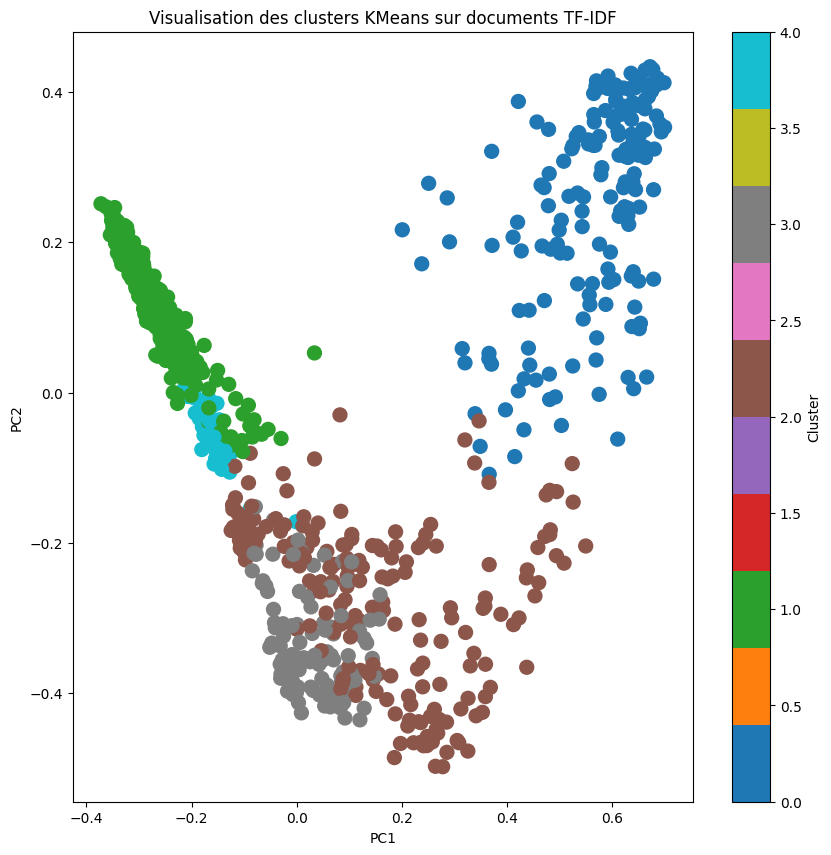

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA sur TF-IDF
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# KMeans
N_CLUSTERS = 5
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)

# Coordonnées
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

# Scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters, cmap='tab10')
plt.title("Visualisation des clusters KMeans sur documents TF-IDF")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()

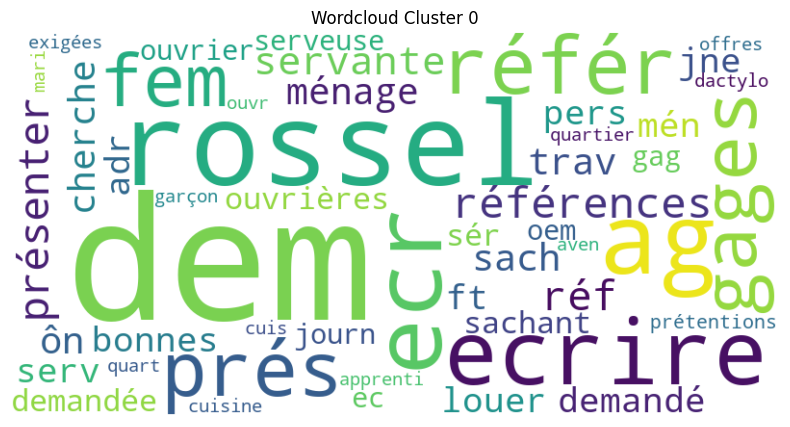

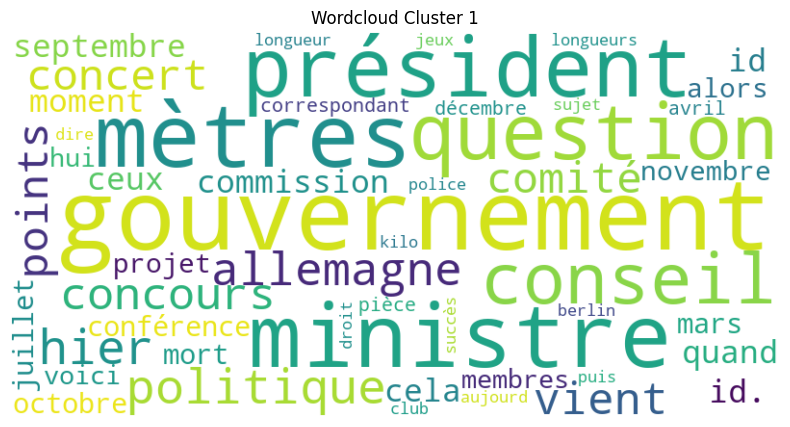

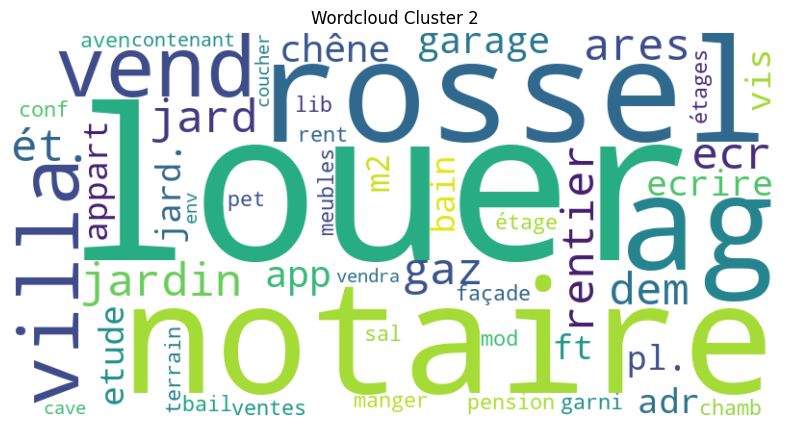

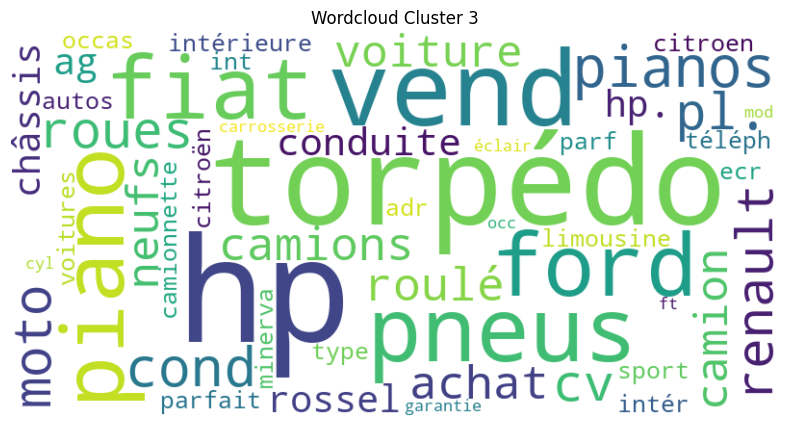

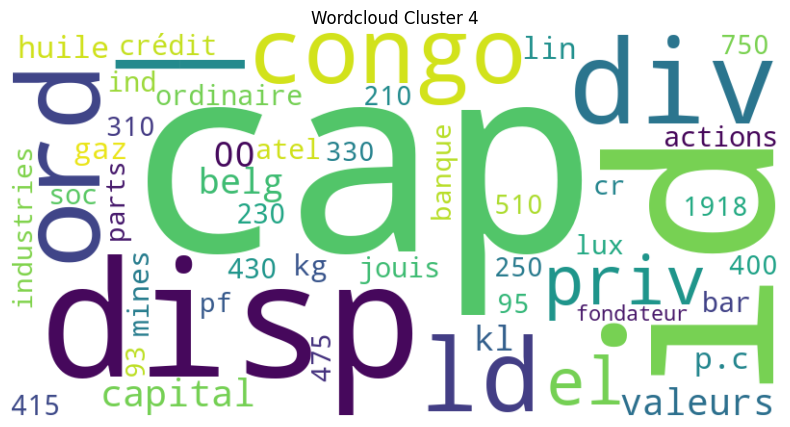

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster_id in range(N_CLUSTERS):
    centroid = km_model.cluster_centers_[cluster_id]
    top_idx = centroid.argsort()[::-1][:50]  # top 50 mots
    top_terms = {terms[i]: centroid[i] for i in top_idx}
    
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(top_terms)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud Cluster {cluster_id}")
    plt.show()
